i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
save_animation?
1


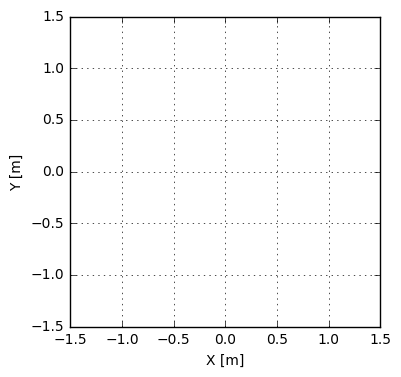

In [4]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import math

class RRT():
    def __init__(self, init_x, init_y):
        # 初期設定
        self.x = init_x
        self.y = init_y

        # パラメータ群
        # 伸ばし幅
        self.d = 0.1

        # 探索範囲
        self.MAX_x = 3
        self.MAX_y = 3
        self.min_x = -3
        self.min_y = -3

        # ノードを作成する
        # これはただのノード
        self.Nodes = np.array([[init_x, init_y]])
        # これはpath
        self.path_x = np.empty((0,2), float)
        self.path_y = np.empty((0,2), float)
        # samples
        self.samples = np.empty((0,2), float)

        self.nearest_node =None
        self.new_node =None

    def search(self):
        # random点を打つ(-1.5, 1.5の範囲で選ぶ)
        s_x = (np.random.rand() * self.MAX_x) - self.MAX_x/2
        s_y = (np.random.rand() * self.MAX_y) - self.MAX_y/2

        sample = np.array([s_x, s_y])
        self.samples = np.append(self.samples, [[s_x, s_y]], axis=0)

        # ノード探索
        distance = float('inf')
        self.nearest_node = None

        for i in range(self.Nodes.shape[0]):
            node = self.Nodes[i, :]
            part_MSE = (sample - node) * (sample - node)
            RMSE = math.sqrt(sum(part_MSE))

            # 距離が小さかったら追加
            if RMSE < distance:
                distance = RMSE
                self.nearest_node = node

        # 新ノードを作成
        pull = sample - self.nearest_node
        grad = math.atan2(pull[1], pull[0])

        d_x = math.cos(grad) * self.d
        d_y = math.sin(grad) * self.d

        self.new_node = self.nearest_node + np.array([d_x, d_y])

        return self.nearest_node, self.new_node


    def path_make(self):
        # 新ノードを追加
        self.Nodes = np.vstack((self.Nodes, self.new_node))

        self.path_x = np.append(self.path_x, np.array([[self.nearest_node[0], self.new_node[0]]]), axis=0)
        self.path_y = np.append(self.path_y, np.array([[self.nearest_node[1], self.new_node[1]]]), axis=0)

        return self.Nodes, self.path_x, self.path_y, self.samples

class Figures():
    def __init__(self):
        self.fig = plt.figure()
        self.axis = self.fig.add_subplot(111)

    def fig_set(self):
        # 初期設定
        MAX_x = 1.5
        min_x = -1.5
        MAX_y = 1.5
        min_y = -1.5

        self.axis.set_xlim(min_x, MAX_x)
        self.axis.set_ylim(min_y, MAX_y)

        # 軸
        self.axis.grid(True)

        # 縦横比
        self.axis.set_aspect('equal')

        # label
        self.axis.set_xlabel('X [m]')
        self.axis.set_ylabel('Y [m]')

    def plot(self, path_x, path_y, Nodes):
        self.axis.plot(path_x, path_y)
        self.axis.plot(Nodes[:, 0], Nodes[:, 1], '.', color='k')

        plt.show()

    def anim_plot(self, path_x, path_y, Nodes, samples):
        imgs = []

        for i in range(path_x.shape[1]):
            path_imgs = []
            # pathとサンプルを追加
            img_sample = self.axis.plot(samples[i, 0], samples[i, 1], '*', color='b')
            path_imgs.extend(img_sample)
            img_nodes = self.axis.plot(Nodes[:i+2, 0], Nodes[:i+2, 1], '.', color='k')
            path_imgs.extend(img_nodes)

            for k in range(i+1):
                img_path = self.axis.plot(path_x[:, k], path_y[:, k], color='b')
                path_imgs.extend(img_path)
                # print('k = {0}'.format(k))

            print('i = {0}'.format(i))
            imgs.append(path_imgs)

        animation = ani.ArtistAnimation(self.fig, imgs)

        print('save_animation?')
        shuold_save_animation = int(input())

        if shuold_save_animation:
            animation.save('basic_animation.gif', writer='imagemagick')
        plt.show()


def main():
    # figures
    figure = Figures()
    figure.fig_set()

    # pathmake
    path_planner = RRT(0.0, 0.0)
    iterations = 100

    for k in range(iterations):
        path_planner.search()
        Nodes, path_x, path_y, samples = path_planner.path_make()

    # img用に処理
    path_x = path_x.transpose()
    path_y = path_y.transpose()

    figure.anim_plot(path_x, path_y, Nodes, samples)

if __name__ == '__main__':
    main()